# World Wide Products Inc.

## Shipping and delivering to a place near you

#### Author: Ruturaj Kiran Vaidya

In [2]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
import sys
# sys.path.append('/Ruturaj/Anaconda/anaconda3/envs/data_science/lib/python3.7/site-packages')
# sys.path.append('/nfs/users/r668v698/.local/lib/python3.7/site-packages')
# sys.path.append("/Ruturaj/data_science/data_vnv/lib/python3.7/site-packages")

# Dickey-Fuller test
import sklearn
# from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt



#### Dataset: <a>https://www.kaggle.com/felixzhao/productdemandforecasting</a>

### Importing Dataset and Feature Engineering

In [2]:
forecast = pd.read_csv("../data/external/historical_product_demand.csv").dropna()

In [3]:
forecast.tail()

,Product_Code,Warehouse,Product_Category,Date,Order_Demand
1048570,Product_1791,Whse_J,Category_006,2016/4/27,1000
1048571,Product_1974,Whse_J,Category_006,2016/4/27,1
1048572,Product_1787,Whse_J,Category_006,2016/4/28,2500
1048573,Product_0901,Whse_J,Category_023,2016/10/7,50
1048574,Product_0704,Whse_J,Category_001,2016/6/27,4


In [4]:
forecast.shape

(1037336, 5)

In [5]:
# We have to build forecasting model to get the demand for the particular product
# As can be seen from the description, Product_1359 is a top product and there are 2160 unique products with
# 33 unique categories
forecast.describe()

,Product_Code,Warehouse,Product_Category,Date,Order_Demand
count,1037336,1037336,1037336,1037336,1037336
unique,2160,4,33,1729,3749
top,Product_1359,Whse_J,Category_019,2013/9/27,1000
freq,16936,764447,470266,2075,112263


In [6]:
# Lets select the dataframe containing only Product_1359
product = forecast.loc[forecast['Product_Code'].isin(["Product_1359"])]
# Dropping the unwanted columns and now we know that the dataset "product" belongs to the
# product "Product_1359"
del product["Warehouse"]
del product["Product_Category"]
del product["Product_Code"]
product = product.reset_index(drop=True)
# Converting date into datetime object
product["Date"] = pd.to_datetime(product['Date'])
product.head()

,Date,Order_Demand
0,2012-04-18,80000
1,2012-05-21,70000
2,2012-06-26,80000
3,2012-07-17,100000
4,2012-08-24,100000


In [7]:
product.dtypes

Date            datetime64[ns]
Order_Demand            object
dtype: object

In [8]:
# type of Order_demand column is object
# When I tried to convert it into int, I found that there are some values line "(5000)"
print(product.shape)
product["Order_Demand"] = pd.to_numeric(product["Order_Demand"], errors='coerce')
product = product.dropna()
print(product.shape)
# This is nice! We don't have to remove those brackets as removes only few rows!

# What if there are multiple orders on same date?
# Sum all the orders for same date
product = product.groupby("Date").sum().reset_index()

# making Date as index to plot
product = product.set_index('Date')

(16936, 2)
(16912, 2)


### Plotting for various "trends"

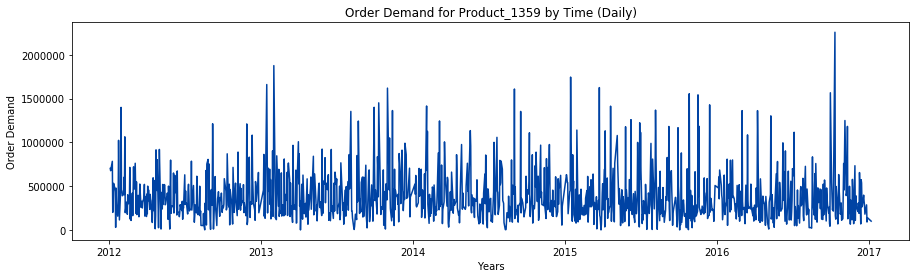

In [36]:
# plotting 
# Plot closing price

register_matplotlib_converters()
plt.figure(figsize=(15, 4))
plt.plot(product, color="#0043A4")
plt.title('Order Demand for Product_1359 by Time (Daily)')
plt.ylabel('Order Demand')
plt.xlabel('Years')
plt.grid(False)
plt.show();

#### Lets plot by summing all the orders values per month for better visualization.

Basically from these kinds of plots, we visualize "trends".

#### Following Observations can be made after looking at the data:

<ul>
<li> As can be seen from the above graphs, data is pretty wild </li>
<li> There may be differences in varients over time </li>
<li> There may be seasonalities, cycles or some ouliers </li>
</ul>

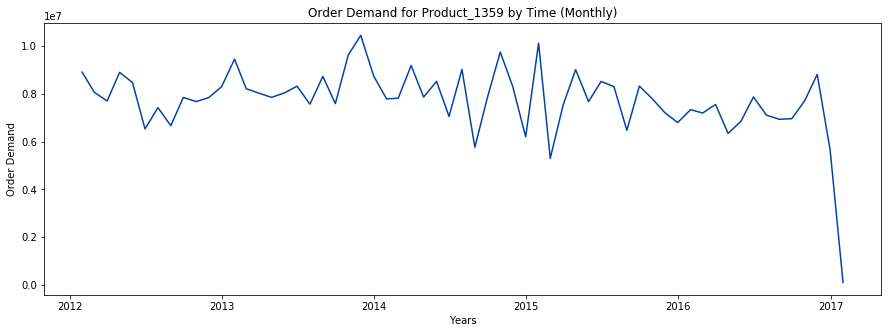

In [37]:
plt.figure(figsize=(15, 5))
plt.plot(product.resample("M").sum(), color="#0043A4")
plt.title('Order Demand for Product_1359 by Time (Monthly)')
plt.ylabel('Order Demand')
plt.xlabel('Years')
plt.grid(False)
plt.show();

#### The above data makes sense as there are a lot less values for the year 2017

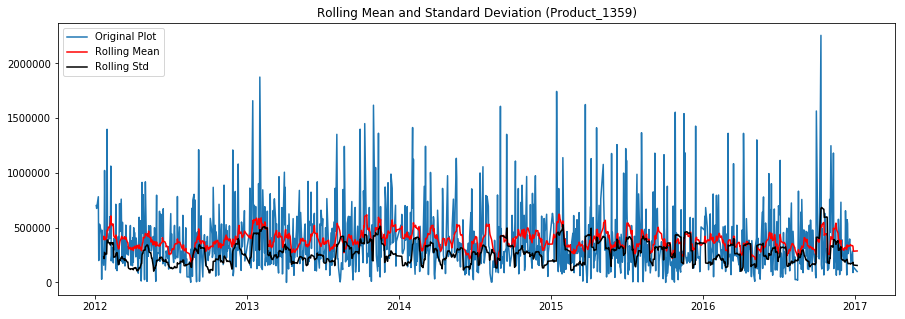

In [41]:
# Now we will determine and plot rolling statistics
plt.figure(figsize=(15, 5))
orignal = plt.plot(product, label="Original Plot")
original_mean = plt.plot(product.rolling(window=12).mean(), label="Rolling Mean", color="red")
original_std = plt.plot(product.rolling(window=12).std(), label="Rolling Std", color="black")
plt.title("Rolling Mean and Standard Deviation (Product_1359)")
plt.legend(loc="best")
plt.show(block=False);

#### As seen from above graph, data isn't stationary, as rolling mean and standard deviation isn't stationary

In [ ]:
# Dickey-Fuller Test


### Using Time series forcasting models

These models or algorithms assume that, the data is stationary. This means that, it should have constant mean, varience, low outliers, and in general, data should follow constant or general trend from the past. So, in short <b>stationarity</b> is important here.